<h1 style="text-align:center;font-size:200%;;">Black Hole Optimization Algorithm</h1>
<h4 style="text-align:center;">Réaliser par  :  DAGHMOUMI Marouan </h4>
<h4 style="text-align:center;">Encadré par  : Pr. JEBARI Khalid</h4>
<img src="Img/img_1.png" alt="FST Logo" width="1700" height="1000" >

## Définition
L'Algorithme d'Optimisation du Trou Noir (AOTN) est une méthode d'optimisation métaheuristique inspirée du phénomène astrophysique des trous noirs. Cet algorithme simule l'interaction entre les étoiles et un trou noir dans l'univers.

## Principe

L'AOTN fonctionne en initialisant une population d'étoiles (solutions candidates) et un trou noir (la meilleure solution). Les étoiles sont attirées par le trou noir et se déplacent vers lui. Si une étoile franchit l'horizon des événements du trou noir, elle est "absorbée" et remplacée par une nouvelle étoile générée aléatoirement.

## Étapes

### 1. Initialisation

Générer une population initiale d'étoiles de manière aléatoire. Chaque étoile représente une solution potentielle au problème d'optimisation.

$\[ \mathbf{X}_i = \mathbf{X}_{\min} + \mathbf{r}_i (\mathbf{X}_{\max} - \mathbf{X}_{\min}) \]$

- $\(\mathbf{X}_i\)$ : Position de la \(i\)-ème étoile.
- $\(\mathbf{X}_{\min}\)$ : Limite inférieure de l'espace de recherche.
- $\(\mathbf{X}_{\max}\)$ : Limite supérieure de l'espace de recherche.
- $\(\mathbf{r}_i\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 2. Évaluation

Évaluer la fitness de chaque étoile en utilisant la fonction objectif du problème d'optimisation.

$\[ f_i = f(\mathbf{X}_i) \]$

- $\(f_i\)$ : Fitness de la \(i\)-ème étoile.
- $\(f(\cdot)\)$ : Fonction objectif.

### 3. Sélection du Trou Noir

Sélectionner l'étoile avec la meilleure fitness comme étant le trou noir.

$\[ \mathbf{X}_{\text{TrouNoir}} = \arg \min_{\mathbf{X}_i} f(\mathbf{X}_i) \]$

### 4. Calcul du Rayon de l'Horizon des Événements

Calculer le rayon de l'horizon des événements du trou noir.

$\[ R = \frac{f_{\text{TrouNoir}}}{\sum_{i=1}^N f_i} \]$

- $\(R\)$ : Rayon de l'horizon des événements.
- $\(f_{\text{TrouNoir}}\)$ : Fitness du trou noir.
- $\(N\)$ : Nombre total d'étoiles.

### 5. Mise à jour des Positions des Étoiles

Mettre à jour la position de chaque étoile en l'attirant vers le trou noir.

$\[ \mathbf{X}_i^{\text{nouveau}} = \mathbf{X}_i + \mathbf{r} \cdot (\mathbf{X}_{\text{TrouNoir}} - \mathbf{X}_i) \]$

- $\(\mathbf{X}_i^{\text{nouveau}}\)$ : Nouvelle position de la \(i\)-ème étoile.
- $\(\mathbf{r}\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 6. Absorption et Régénération

Si une étoile franchit l'horizon des événements (c'est-à-dire si sa distance au trou noir est inférieure à $\(R\)$), elle est absorbée et une nouvelle étoile est générée aléatoirement pour la remplacer.

### 7. Terminaison

Si les critères d'arrêt sont atteints (par exemple, nombre maximum d'itérations atteint, solution suffisamment bonne), arrêter l'algorithme et renvoyer la position du trou noir comme meilleure solution. Sinon, retourner à l'étape 2.

L'AOTN est particulièrement efficace pour les problèmes d'optimisation globale et peut s'adapter à une variété de domaines d'application. Son principal avantage réside dans sa capacité à équilibrer l'exploration de l'espace de recherche et l'exploitation des meilleures solutions trouvées.


<img src="Img/chart_black.png" alt="FST Logo" width="1000" height="1500" >

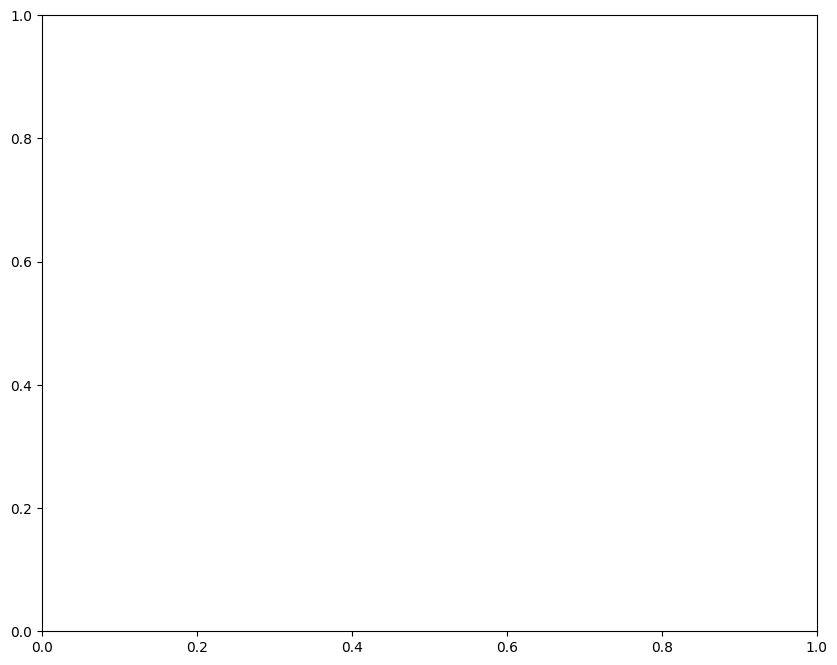

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Button, Output, VBox
from IPython.display import display, clear_output, HTML

# Ensure that matplotlib plots are displayed inline in the notebook
%matplotlib inline

class OptimisationTrouNoir:
    def __init__(self, fonction_objectif, dimensions, bornes, taille_population, iterations_max):
        self.fonction_objectif = fonction_objectif
        self.dimensions = dimensions
        self.bornes = bornes
        self.taille_population = taille_population
        self.iterations_max = iterations_max
        
        self.population = None
        self.fitness = None
        self.trou_noir = None
        self.meilleure_fitness = float('inf')
        self.iteration_courante = 0
        
    def initialiser_population(self):
        self.population = np.random.uniform(self.bornes[0], self.bornes[1], 
                                            (self.taille_population, self.dimensions))
        self.fitness = np.array([self.fonction_objectif(etoile) for etoile in self.population])
        self.trou_noir = self.population[np.argmin(self.fitness)]
        self.meilleure_fitness = np.min(self.fitness)
        
    def calculer_rayon_horizon(self):
        rayon = self.meilleure_fitness / np.sum(self.fitness)
        print(f"Rayon de l'horizon des événements: {rayon}")
        return rayon
    
    def mettre_a_jour_position(self):
        for i in range(self.taille_population):
            r = np.random.random(self.dimensions)
            new_position = self.population[i] + r * (self.trou_noir - self.population[i])
            print(f"Étoile {i+1} position mise à jour: {new_position}")
            self.population[i] = new_position
            
    def absorber_et_regenerer(self, rayon):
        for i in range(self.taille_population):
            distance = np.linalg.norm(self.population[i] - self.trou_noir)
            if distance < rayon:
                new_position = np.random.uniform(self.bornes[0], self.bornes[1], self.dimensions)
                print(f"Étoile {i+1} absorbée et régénérée à la position: {new_position}")
                self.population[i] = new_position
                
    def iteration(self):
        if self.iteration_courante < self.iterations_max:
            self.mettre_a_jour_position()
            self.fitness = np.array([self.fonction_objectif(etoile) for etoile in self.population])
            
            meilleur_index = np.argmin(self.fitness)
            if self.fitness[meilleur_index] < self.meilleure_fitness:
                self.trou_noir = self.population[meilleur_index]
                self.meilleure_fitness = self.fitness[meilleur_index]
            
            rayon = self.calculer_rayon_horizon()
            self.absorber_et_regenerer(rayon)
            
            self.iteration_courante += 1
            return True
        else:
            return False

def sphere_function(x):
    return np.sum(x**2)

dimensions = 2
bornes = (-5.12, 5.12)
taille_population = 50
iterations_max = 100

optimiseur = OptimisationTrouNoir(sphere_function, dimensions, bornes, taille_population, iterations_max)
optimiseur.initialiser_population()

button = Button(description="Itération suivante")
output = Output()

def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        if optimiseur.iteration():
            afficher_resultats()
        else:
            print("Optimisation terminée!")
            print(f"Meilleure solution : {optimiseur.trou_noir}")
            print(f"Meilleure fitness : {optimiseur.meilleure_fitness}")
            afficher_resultats()

def afficher_resultats():
    print(f"Itération: {optimiseur.iteration_courante}")
    print(f"Meilleure fitness actuelle: {optimiseur.meilleure_fitness}")
    
    if dimensions == 2:
        plt.figure(figsize=(10, 8))
        x = np.linspace(bornes[0], bornes[1], 100)
        y = np.linspace(bornes[0], bornes[1], 100)
        X, Y = np.meshgrid(x, y)
        Z = sphere_function(np.array([X, Y]))
        
        plt.contour(X, Y, Z, levels=20)
        plt.colorbar(label='Valeur de la fonction objectif')
        plt.scatter(optimiseur.population[:, 0], optimiseur.population[:, 1], c='blue', label='Étoiles')
        plt.scatter(optimiseur.trou_noir[0], optimiseur.trou_noir[1], c='red', s=100, label='Trou Noir')
        plt.title(f"Optimisation du Trou Noir - Itération {optimiseur.iteration_courante}")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.legend()
        plt.show()
        print("Plot displayed successfully.")

    # Affichage des résultats de chaque étoile
    table_html = "<table><tr><th>Étoile</th><th>Fitness</th></tr>"
    for i, fit in enumerate(optimiseur.fitness):
        table_html += f"<tr><td>{i+1}</td><td>{fit:.6f}</td></tr>"
    table_html += "</table>"
    display(HTML(table_html))

button.on_click(on_button_clicked)
display(VBox([button, output]))

# Initial call to display the initial population
with output:
    afficher_resultats()
